# **1. Import Library**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.model_selection import GridSearchCV

# **2. Loading Datasets from Clustering Results**


In [9]:
df = pd.read_csv('./Clustered_Ship_Performance_Dataset.csv')
df.head()

,Unnamed: 0,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,...,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Numerical Cluster,Categorical Cluster
0,1,2023-06-11,Fish Carrier,Short-haul,Steam Turbine,2,10.387580,1796.057415,1060.486382,14.653083,...,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,3,2
1,2,2023-06-18,Container Ship,Long-haul,Diesel,1,20.749747,1648.556685,658.874144,7.199261,...,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,3,6
2,3,2023-06-25,Bulk Carrier,Transoceanic,Steam Turbine,1,21.055102,915.261795,1126.822519,11.789063,...,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,0,6
3,4,2023-07-02,Fish Carrier,Transoceanic,Diesel,1,13.742777,1089.721803,1445.281159,9.727833,...,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,3,6
4,5,2023-07-09,Fish Carrier,Long-haul,Heavy Fuel Oil (HFO),1,18.616196,2171.646567,723.304215,14.916320,...,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,2,5


In [ ]:
df.drop(columns=['Unnamed: 0', 'Date', 'Ship_Type',
        'Route_Type', 'Engine_Type'], inplace=True)


df.head()

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage,Numerical Cluster,Categorical Cluster
0,2,10.387580,1796.057415,1060.486382,14.653083,0,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372,3,2
1,1,20.749747,1648.556685,658.874144,7.199261,1,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244,3,6
2,1,21.055102,915.261795,1126.822519,11.789063,1,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698,0,6
3,1,13.742777,1089.721803,1445.281159,9.727833,1,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581,3,6
4,1,18.616196,2171.646567,723.304215,14.916320,0,1912.509751,184569.045384,776698.354849,47.476155,1.370206,1.437725,7,53.174898,2,5


In [11]:
df['Numerical Cluster'].value_counts(normalize=True)

Numerical Cluster
0    0.258580
2    0.247767
3    0.246827
1    0.246827
Name: proportion, dtype: float64

In [12]:
df['Categorical Cluster'].value_counts(normalize=True)

Categorical Cluster
6    0.126939
7    0.126469
1    0.112835
2    0.109544
8    0.108134
4    0.107193
0    0.105783
3    0.102962
5    0.100141
Name: proportion, dtype: float64

# **3. Data Splitting**


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df.drop(columns=['Numerical Cluster', 'Categorical Cluster']),
    df[['Numerical Cluster', 'Categorical Cluster']],
    test_size=0.2,
    random_state=42
)

In [17]:
X_test

,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
282,2,16.073470,2483.336317,363.501830,10.349216,2,935.639915,50389.562301,295890.032022,14.630979,0.663058,1.293694,8,55.214019
1999,2,18.988683,2893.597406,974.925354,10.778559,2,1459.595141,90560.960804,831831.031379,46.615815,1.208856,0.939439,3,98.883117
1709,1,13.211454,2560.492585,698.081845,13.465020,1,1458.171928,434209.708002,564354.202702,45.188878,0.288502,0.947839,8,86.298226
988,1,20.122614,1104.515512,549.544729,11.655163,1,464.864001,334398.222608,286985.366631,49.841130,0.475597,1.381390,3,59.584161
2018,2,15.541223,1316.084392,122.027548,5.681968,1,1498.303002,485012.097091,584406.213834,68.713332,0.609905,1.148866,3,80.267351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2,23.450580,1267.702564,120.036889,6.918317,1,1530.393997,106471.887540,704652.692243,61.805841,0.545655,0.982798,3,87.909895
973,1,12.083724,1988.097412,882.289966,5.677828,0,627.544476,360471.667936,697364.050274,34.253449,0.953542,0.615984,1,95.117286
611,1,14.644566,2944.882751,1347.688374,10.108216,0,1672.139213,120683.869204,156596.608843,50.125938,1.161582,0.967649,4,64.854731
2109,1,16.518924,1970.636235,252.789272,8.380833,2,1353.195457,183592.579826,487835.230258,46.624345,0.281929,1.486786,9,92.975270


In [18]:
Y_test

,Numerical Cluster,Categorical Cluster
282,2,0
1999,1,0
1709,2,6
988,1,6
2018,1,1
...,...,...
305,1,1
973,1,5
611,1,5
2109,3,8


# **4. Building a Classification Model**


## **a. Model Development**


Since clustering is built with a hierarchical approach, we will use tree-based models.


**_Decision Tree_** is a supervised learning algorithm used for classification and regression. It works by recursively splitting the dataset based on feature conditions that maximize information gain (for classification) or reduce variance (for regression). The root node represents the entire dataset, and each split creates child nodes, forming branches until a stopping criterion is met, such as a maximum depth or minimum samples per leaf. For classification tasks, the majority class in a leaf node determines the final prediction, while for regression, the prediction is based on the mean or median of the values in a leaf node. Decision Trees are highly interpretable but can easily overfit the training data.


**_Random Forest_** is an ensemble learning method that improves upon Decision Trees by building multiple trees and combining their outputs. It creates multiple random subsets of the training data using bootstrap sampling and trains a separate Decision Tree on each subset. Additionally, at each split, a random subset of features is chosen to introduce diversity among the trees. For classification, the final prediction is determined by majority voting among the trees, while for regression, the outputs are averaged. By aggregating multiple Decision Trees, Random Forest reduces overfitting and improves generalization, though at the cost of reduced interpretability compared to a single Decision Tree.


In [19]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [20]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)

RandomForestClassifier()

## **b. Model Evaluation**


In [ ]:
def evaluate_model(train_prediction, test_prediction, Y_train, Y_test):
    print("Numerical Cluster")
    print(
        f"Training data accuracy: {accuracy_score(train_prediction[:, 0], Y_train.values[:, 0]) * 100:.2f}%")
    print(
        f"Training data F1 score: {f1_score(train_prediction[:, 0], Y_train.values[:, 0], average='macro')}")
    print(
        f"Test data accuracy: {accuracy_score(test_prediction[:, 0], Y_test.values[:, 0]) * 100:.2f}%")
    print(
        f"Test data F1 score: {f1_score(test_prediction[:, 0], Y_test.values[:, 0], average='macro')}")

    print("\n")

    print("Categorical Cluster")
    print(
        f"Training data accuracy: {accuracy_score(train_prediction[:, 1], Y_train.values[:, 1]) * 100:.2f}%")
    print(
        f"Training data F1 score: {f1_score(train_prediction[:, 1], Y_train.values[:, 1], average='macro')}")
    print(
        f"Test data accuracy: {accuracy_score(test_prediction[:, 1], Y_test.values[:, 1]) * 100:.2f}%")
    print(
        f"Test data F1 score: {f1_score(test_prediction[:, 1], Y_test.values[:, 1], average='macro')}")

In [ ]:
def plot_confusion_matrix(model, Y_test, test_prediction):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    cluster_names = ["Numerical Cluster", "Categorical Cluster"]

    for i, ax in enumerate(axes):
        cm = confusion_matrix(
            Y_test.values[:, i], test_prediction[:, i], labels=model.classes_[i])
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=model.classes_[i])
        disp.plot(ax=ax)
        ax.set_title(f"Confusion Matrix for {cluster_names[i]}")

    plt.tight_layout()
    plt.show()

### Decision Tree


In [54]:
train_prediction = dt_clf.predict(X_train)
test_prediction = dt_clf.predict(X_test)

In [59]:
evaluate_model(train_prediction, test_prediction, Y_train, Y_test)

Numerical Cluster
Training data accuracy: 77.60%
Training data F1 score: 0.7756927975876576
Test data accuracy: 73.00%
Test data F1 score: 0.728991978991979


Categorical Cluster
Training data accuracy: 100.00%
Training data F1 score: 1.0
Test data accuracy: 100.00%
Test data F1 score: 1.0


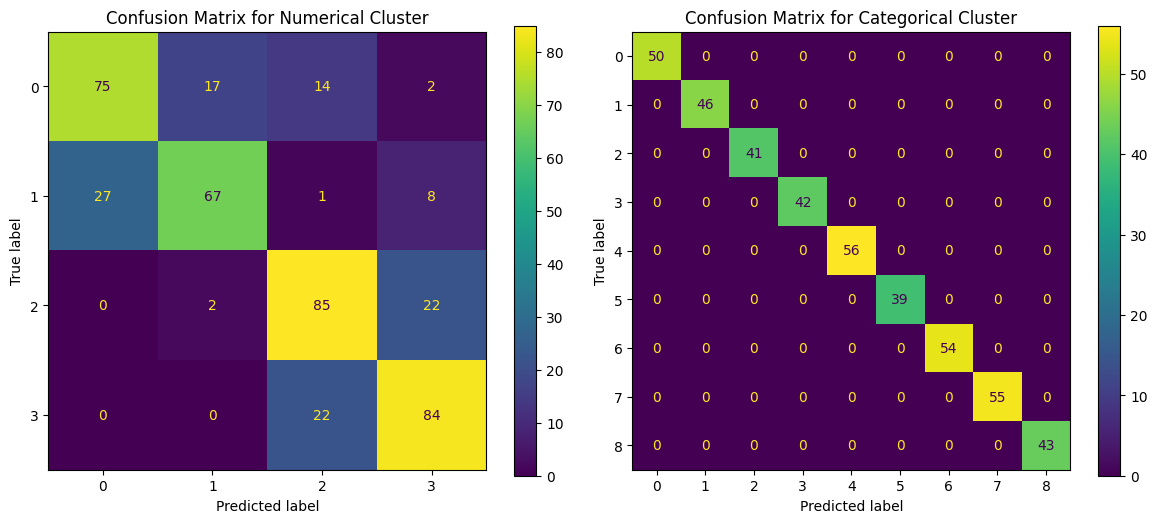

In [62]:
plot_confusion_matrix(dt_clf, Y_test, test_prediction)

### Random Forest


In [63]:
train_prediction = rf_clf.predict(X_train)
test_prediction = rf_clf.predict(X_test)

In [64]:
evaluate_model(train_prediction, test_prediction, Y_train, Y_test)

Numerical Cluster
Training data accuracy: 100.00%
Training data F1 score: 1.0
Test data accuracy: 84.51%
Test data F1 score: 0.8452081466308198


Categorical Cluster
Training data accuracy: 100.00%
Training data F1 score: 1.0
Test data accuracy: 100.00%
Test data F1 score: 1.0


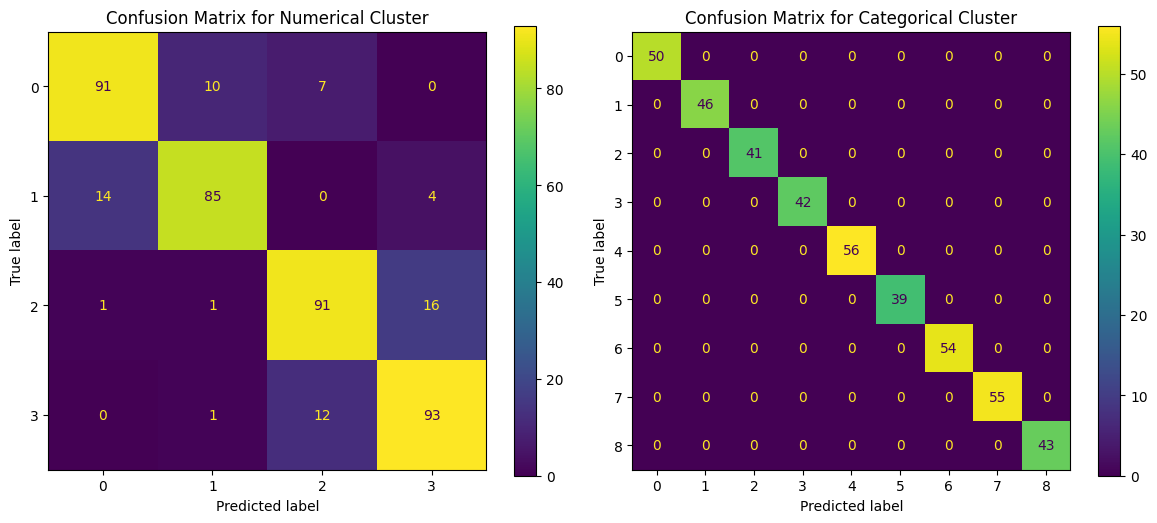

In [65]:
plot_confusion_matrix(rf_clf, Y_test, test_prediction)

### Conclusion


- The Decision Tree model for numerical data exhibits lower generalization capability, as indicated by a drop in performance from training to test data.
- The Random Forest model performs better, achieving higher accuracy and F1 scores on test data, particularly for numerical data. This improvement is due to Random Forest’s ensemble nature, which reduces overfitting and enhances generalization.
- Both models perform perfectly on categorical data.


## **c. Hyperparameter Tuning**


In [27]:
def multioutput_f1_score(y_true, y_pred):
    # Convert to numpy arrays if they're DataFrames
    if hasattr(y_true, 'to_numpy'):
        y_true = y_true.to_numpy()
    if hasattr(y_pred, 'to_numpy'):
        y_pred = y_pred.to_numpy()
    # Calculate F1 for each label and average them
    scores = [f1_score(y_true[:, i], y_pred[:, i], average='micro')
              for i in range(y_true.shape[1])]
    return np.mean(scores)


custom_f1_scorer = make_scorer(multioutput_f1_score)

### Decision Tree


In [29]:
param_space_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    'max_features': [None, 'sqrt', 'log2']
}

dt_clf = DecisionTreeClassifier()
random_search_dt = GridSearchCV(
    dt_clf, param_space_dt, scoring=custom_f1_scorer, cv=5, n_jobs=-1)
random_search_dt.fit(X_train, Y_train)

print("Best parameters for DecisionTreeClassifier:",
      random_search_dt.best_params_)
print("Best custom F1 score:", random_search_dt.best_score_)

Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 50, 'splitter': 'best'}
Best custom F1 score: 0.8762480593410384


### Random Forest


In [31]:
param_space_rf = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
    'min_samples_split': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    'max_features': [None, 'sqrt', 'log2']
}

rf_clf = RandomForestClassifier()
random_search_rf = GridSearchCV(
    rf_clf, param_space_rf, scoring=custom_f1_scorer, cv=5, n_jobs=-1)
random_search_rf.fit(X_train, Y_train)

print("Best parameters for RandomForestClassifier:",
      random_search_rf.best_params_)
print("Best custom F1 score:", random_search_rf.best_score_)

Best parameters for RandomForestClassifier: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best custom F1 score: 0.9256279109884422


## **d. Model Evaluation after Tuning**


### Decision Tree


In [72]:
dt_clf = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=None,
                                min_samples_leaf=8, min_samples_split=50, splitter='best')


dt_clf.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_leaf=8, min_samples_split=50)

In [73]:
train_prediction = dt_clf.predict(X_train)
test_prediction = dt_clf.predict(X_test)

In [74]:
evaluate_model(train_prediction, test_prediction, Y_train, Y_test)

Numerical Cluster
Training data accuracy: 77.60%
Training data F1 score: 0.7756927975876576
Test data accuracy: 73.24%
Test data F1 score: 0.7311856741570135


Categorical Cluster
Training data accuracy: 100.00%
Training data F1 score: 1.0
Test data accuracy: 100.00%
Test data F1 score: 1.0


### Random Forest


In [75]:
rf_clf = RandomForestClassifier(criterion='entropy', max_depth=20,
                                max_features='log2', min_samples_split=2, min_samples_leaf=1)


rf_clf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features='log2')

In [76]:
train_prediction = rf_clf.predict(X_train)
test_prediction = rf_clf.predict(X_test)

In [78]:
evaluate_model(train_prediction, test_prediction, Y_train, Y_test)

Numerical Cluster
Training data accuracy: 100.00%
Training data F1 score: 1.0
Test data accuracy: 83.10%
Test data F1 score: 0.8306368895773228


Categorical Cluster
Training data accuracy: 100.00%
Training data F1 score: 1.0
Test data accuracy: 100.00%
Test data F1 score: 1.0


### Conclusion


- The Decision Tree model for numerical data has lower accuracy and F1 score on test data, indicating that it struggles to generalize well.

- The Random Forest model performs significantly better for numerical data, achieving higher test accuracy and F1 score, making it a more reliable option.

- Both models achieve perfect performance on categorical data, suggesting that the categorical classification task is relatively easy.


## **e. Model Evaluation Results Analysis**


The model is **_overfitting_** for the numerical label due to the low separation between clusters (0.38 silhouette score).

In the future, consider using different clustering algorithms and metrics.
